In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
insurance_data = pd.read_csv("C:\\Users\\Anuruddha\\Desktop\\ML_projects\\11.Medical_Insurance_Cost_Prediction\\dataset\\insurance.csv")

## Data understanding 

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.shape

(1338, 7)

In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# identify class in categorical columns

insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Anuruddha\AppData\Local\Temp\ipykernel_3004\2411080082.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


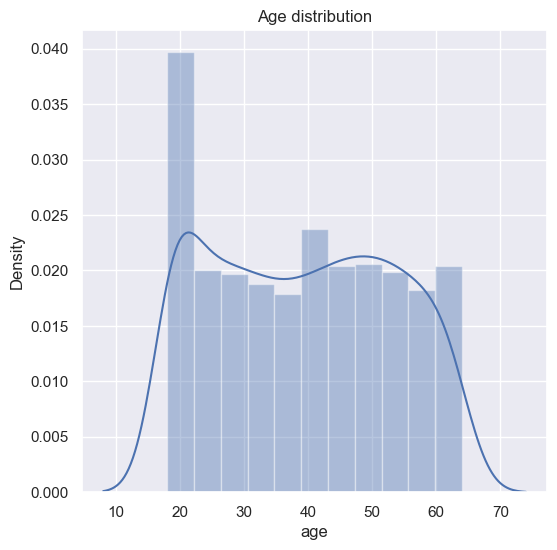

In [16]:
# find distribution of age values

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title("Age distribution")
plt.show()

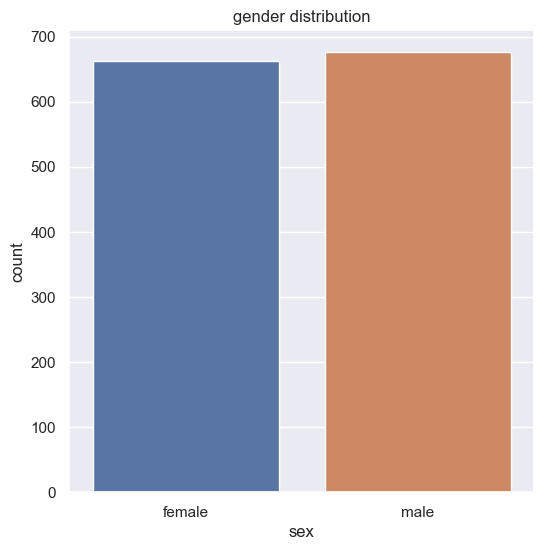

In [19]:
# find distribution of age values

plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_data)
plt.title("gender distribution")
plt.show()

C:\Users\Anuruddha\AppData\Local\Temp\ipykernel_3004\4196255818.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


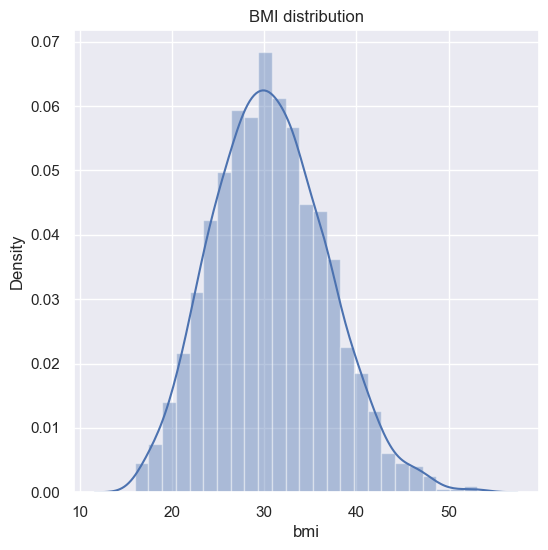

In [20]:
# find distribution of bmi values

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title("BMI distribution")
plt.show()

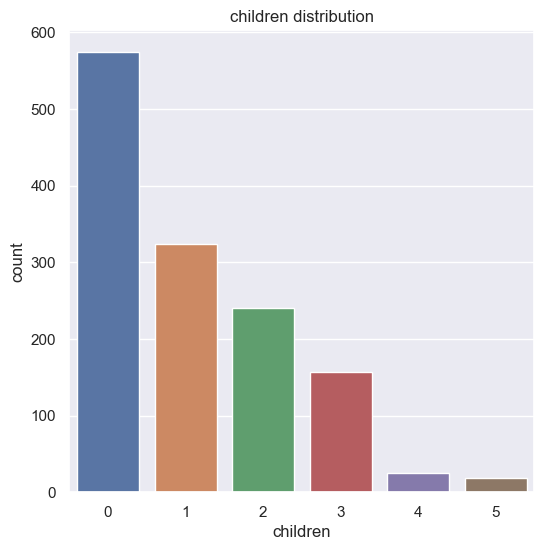

In [22]:
# find distribution of children values

plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_data)
plt.title("children distribution")
plt.show()

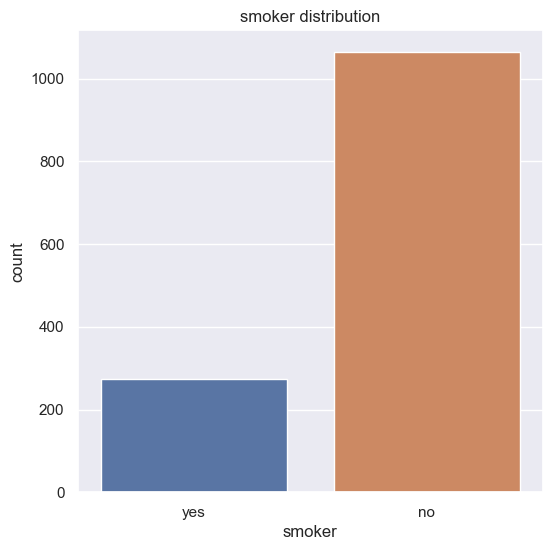

In [23]:
# find distribution of smoker values

plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_data)
plt.title("smoker distribution")
plt.show()

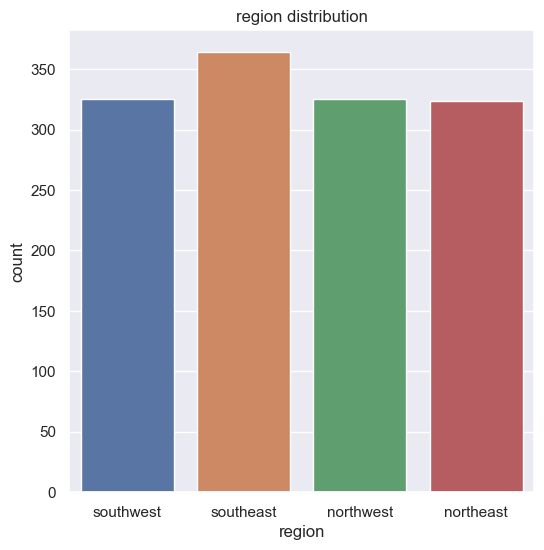

In [24]:
# find distribution of region values

plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_data)
plt.title("region distribution")
plt.show()

C:\Users\Anuruddha\AppData\Local\Temp\ipykernel_3004\315232797.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


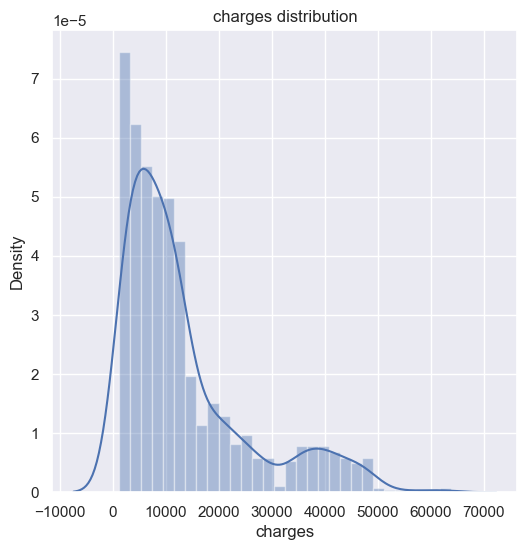

In [25]:
# find distribution of charges values

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title("charges distribution")
plt.show()

##  Data preprocessing

In [30]:
# encoding the catagorical features

insurance_data.replace({'sex':{'male':0, 'female':1}}, inplace=True)
insurance_data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
insurance_data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [31]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


## Split data 

In [33]:
X = insurance_data.drop(columns='charges', axis=1)
Y = insurance_data['charges']

In [34]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [35]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


## Model 

In [41]:
model = LinearRegression()

In [42]:
model.fit(X_train, Y_train)

LinearRegression()

In [45]:
# evaluation

# training data accuracy
training_data_prediction = model.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R square for train:",r2_train)

R square for train: 0.751505643411174


In [48]:
# training data accuracy
test_data_prediction = model.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print("R square for test:",r2_test)

R square for test: 0.7447273869684077


## Predictive sysytem 

In [51]:
input_data = (19,1,27.9,0,0,1)
input_data_as_array = np.asarray(input_data)
reshaped_input_data = input_data_as_array.reshape(1,-1)

prediction = model.predict(reshaped_input_data)
print("the insurance cost is: ", prediction[0])

the insurance cost is:  25597.73941346843


E:\anaconda3_anuruddha\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
